In [1]:
%load_ext wurlitzer

from MulticoreTSNE import MulticoreTSNE as TSNE
import numpy as np

X = np.load("patents_d2v_large.model.docvecs.vectors_docs.npy")

In [ ]:
X_2 = np.load("patents_d2v.model.docvecs.vectors_docs.npy")


In [2]:
print(X.shape)
indexes = np.random.choice(np.array(range(X.shape[0])), 50000, replace = False)
X_small = X[indexes]
print(X_small.shape)

(7018019, 300)
(50000, 300)


In [3]:
tsne = TSNE(perplexity = 20, n_iter = 25000, n_jobs=16)
Y = tsne.fit_transform(X_small)

In [79]:
import numpy.linalg as la

def find_close_to(num, arr, x, y, tol):
    i_s = []
    arrs = []
    i = 0
    for j in range(num):
        close_enough = False
        while not close_enough:
            if la.norm(arr[i] - np.array([x, y])) < tol:
                close_enough = True
                #print(i)
                i_s.append(i)
                
            i += 1
    return ([arr[i] for i in i_s], i_s)

print(find_close_to(2, Y, 30, 45, 2))

([array([30.97334257, 45.72213926]), array([28.26157008, 45.37307867])], [1583, 1959])


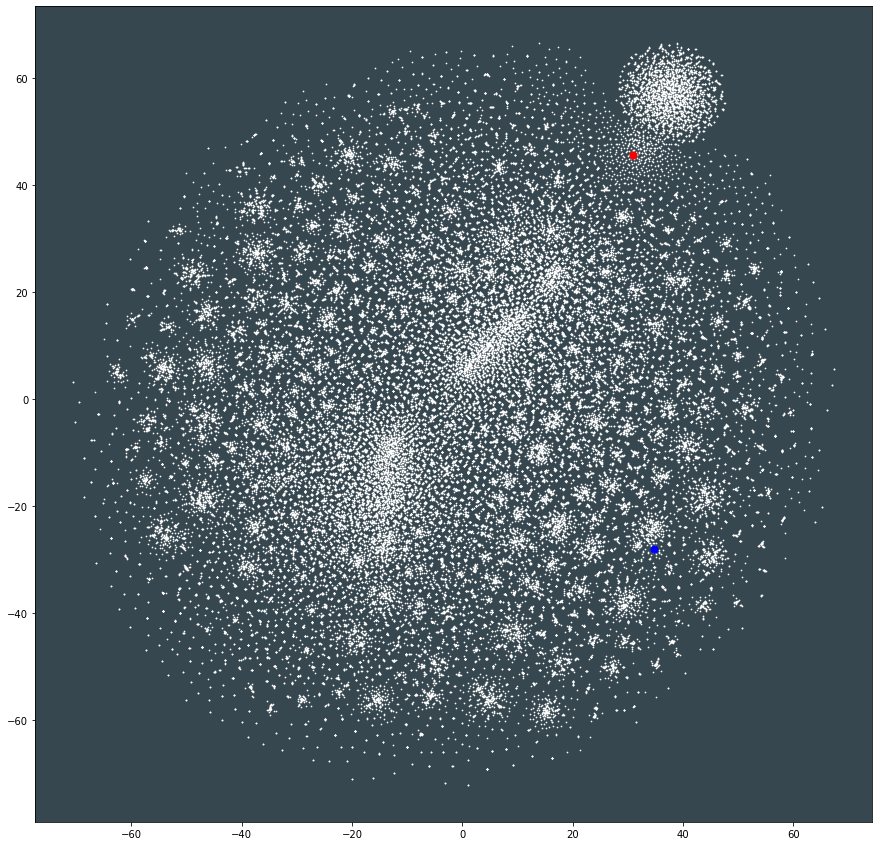

In [81]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
vis_x = Y[:, 0]
vis_y = Y[:, 1]

special_point =1583
special_2 = 4160

plt.scatter(vis_x, vis_y, marker='.',color = 'white', s=2)
plt.scatter(vis_x[special_point], vis_y[special_point], marker='.', color = 'red', s = 200)
plt.scatter(vis_x[special_2], vis_y[special_2], marker='.', color = 'blue', s = 200)
#plt.clim(-0.5, 9.5)
plt.rcParams['axes.facecolor'] = '37474F'
plt.savefig('tSNE-50000rand-25k_iter-20_perplexity')
plt.show()


In [54]:
np.save("indexes.npy", indexes)
np.save("tSNE_vecs.npy", Y)
print(indexes)

[1004081 4584840 4643983 ... 6961707 6980122 4429043]


In [75]:
params = tsne.get_params()

AttributeError: 'MulticoreTSNE' object has no attribute 'get_params'